In [2]:
import pandas as pd

def clean_delay_data(csv_path="mart/public/Dealy.csv"):
    df = pd.read_csv(csv_path)

    # Drop rows with any missing values in key columns
    df = df.dropna(subset=['delay', 'station_name', 'timestamp'])

    # Convert delay to numeric, coerce errors
    df['delay'] = pd.to_numeric(df['delay'], errors='coerce')

    # Drop rows where delay couldn't be converted (NaN)
    df = df.dropna(subset=['delay'])

    # Filter out negative or absurd delays (e.g., > 180 minutes)
    df = df[(df['delay'] >= 0) & (df['delay'] <= 180)]

    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    # Drop rows with invalid timestamps
    df = df.dropna(subset=['timestamp'])

    # Remove duplicates
    df = df.drop_duplicates()

    return df


In [2]:

csv_path = "mart/public/Dealy.csv"
df = pd.read_csv(csv_path,delimiter=';')

In [1]:
df

NameError: name 'df' is not defined

In [5]:
df.columns

Index(['Date of departure', 'Train number', 'Relation', 'Railway operator',
       'Departure line', 'Actual arrival time', 'Actual departure time',
       'Planned arrival time', 'Planned departure time', 'Delay at arrival',
       'Delay at departure', 'Relation direction', 'Stopping place',
       'Arrival line', 'Planned arrival date', 'Planned departure date',
       'Actual arrival date', 'Actual departure date'],
      dtype='object')

In [ ]:
cols_to_keep = [
    'Date of departure',
    'Departure line',
    'Actual arrival time',
    'Actual departure time',
    'Planned arrival time',
    'Planned departure time',
    'Delay at arrival',
    'Delay at departure',
    'Relation direction',
    'Stopping place'
]

# Filter the dataframe
df_filtered = df[cols_to_keep]

# Quick check
print(df_filtered.head())
print(df_filtered.columns)

  Date of departure Departure line Actual arrival time Actual departure time  \
0        2025-06-02             75            16:37:55              16:42:03   
1        2025-06-02             75            16:47:18              16:48:16   
2        2025-06-02            50A            16:54:35              16:56:12   
3        2025-06-02            0/3            17:23:25              17:28:39   
4        2025-06-02            0/3            17:40:45              17:40:45   

  Planned arrival time Planned departure time  Delay at arrival  \
0             16:37:00               16:38:00              55.0   
1             16:44:00               16:45:00             198.0   
2             16:51:00               16:56:00             215.0   
3             17:24:00               17:27:00             -34.0   
4             17:34:00               17:34:00             405.0   

   Delay at departure              Relation direction     Stopping place  
0               243.0  IC 12: KORTRIJK ->

In [7]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,IC 12: KORTRIJK -> WELKENRAEDT,DEINZE
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,IC 12: KORTRIJK -> WELKENRAEDT,DE PINTE
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,IC 12: KORTRIJK -> WELKENRAEDT,GENT-SINT-PIETERS
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,IC 12: KORTRIJK -> WELKENRAEDT,BRUSSEL-ZUID
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,IC 12: KORTRIJK -> WELKENRAEDT,BRUSSEL-CONGRES


In [5]:
# Example: 'Relation direction' column contains strings like "IC 12: KORTRIJK -> WELKENRAEDT"

# Extract the part after the colon (":") first
df_filtered['Relation direction'] = df_filtered['Relation direction'].astype(str)  # ensure string type

# Split by colon, take the second part (stations info)
stations = df_filtered['Relation direction'].str.split(':').str[1].str.strip()

# Split by '->' to get start and end stations
df_filtered[['Start Station', 'End Station']] = stations.str.split('->', expand=True)

# Strip any leading/trailing spaces
df_filtered['Start Station'] = df_filtered['Start Station'].str.strip()
df_filtered['End Station'] = df_filtered['End Station'].str.strip()

# Check the result
print(df_filtered[['Relation direction', 'Start Station', 'End Station']].head())


/tmp/ipykernel_3647369/1775646613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Relation direction'] = df_filtered['Relation direction'].astype(str)  # ensure string type


               Relation direction Start Station  End Station
0  IC 12: KORTRIJK -> WELKENRAEDT      KORTRIJK  WELKENRAEDT
1  IC 12: KORTRIJK -> WELKENRAEDT      KORTRIJK  WELKENRAEDT
2  IC 12: KORTRIJK -> WELKENRAEDT      KORTRIJK  WELKENRAEDT
3  IC 12: KORTRIJK -> WELKENRAEDT      KORTRIJK  WELKENRAEDT
4  IC 12: KORTRIJK -> WELKENRAEDT      KORTRIJK  WELKENRAEDT


/tmp/ipykernel_3647369/1775646613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Start Station', 'End Station']] = stations.str.split('->', expand=True)
/tmp/ipykernel_3647369/1775646613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Start Station', 'End Station']] = stations.str.split('->', expand=True)
/tmp/ipykernel_3647369/1775646613.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [6]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Start Station,End Station
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,IC 12: KORTRIJK -> WELKENRAEDT,DEINZE,KORTRIJK,WELKENRAEDT
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,IC 12: KORTRIJK -> WELKENRAEDT,DE PINTE,KORTRIJK,WELKENRAEDT
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,IC 12: KORTRIJK -> WELKENRAEDT,GENT-SINT-PIETERS,KORTRIJK,WELKENRAEDT
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,IC 12: KORTRIJK -> WELKENRAEDT,BRUSSEL-ZUID,KORTRIJK,WELKENRAEDT
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,IC 12: KORTRIJK -> WELKENRAEDT,BRUSSEL-CONGRES,KORTRIJK,WELKENRAEDT


In [7]:
df_filtered.drop(columns=['Relation direction'], inplace=True)

/tmp/ipykernel_3647369/3260747488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Relation direction'], inplace=True)


In [8]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Stopping place,Start Station,End Station
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,DEINZE,KORTRIJK,WELKENRAEDT
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,DE PINTE,KORTRIJK,WELKENRAEDT
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,GENT-SINT-PIETERS,KORTRIJK,WELKENRAEDT
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,BRUSSEL-ZUID,KORTRIJK,WELKENRAEDT
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,BRUSSEL-CONGRES,KORTRIJK,WELKENRAEDT


In [22]:
stations=pd.read_csv("mart/public/stations.csv", delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: 'mart/public/stations.csv'

In [10]:
list_stations = stations.Name_FR.unique()

In [11]:
list_stations 

array(['Aalst-Kerrebroek', 'Erembodegem', 'Lede', 'Maria-Aalter',
       'Bellem', 'Begijnendijk', 'Langdorp', 'Wezemaal', 'Tielt',
       'Deinze', 'Grammont', 'Lessines', 'Koksijde', 'Farciennes',
       'Tamines', 'Saint-Trond', 'Hasselt', 'Haute-Flône', 'Ampsin',
       'Amay', 'Huy', 'Bas-Oha', 'Château-de-Seilles', 'Chênée',
       'Bressoux', 'Liège-Guillemins', 'Tilff', 'Voroux', 'Ougrée',
       'Zwijndrecht', 'Melsele', 'Sint-Mariaburg', 'Anvers-Noorderdokken',
       'Bierset-Awans', 'Louvain', 'Dinant', 'Gendron-Celles', 'Maubray',
       'Tournai', 'Anvers-Luchtbal', 'Anvers-Est', 'Anvers-Berchem',
       'Anvers-Haven', 'Ekeren', 'Anvers-Central', 'Anvers-Dam',
       'Hoboken-Polder', 'Vichte', 'Audenarde', 'Eichem', 'Zandbergen',
       'Gastuche', 'Florival', 'Messancy', 'Viville', 'Zellik', 'Mollem',
       'Florée', 'Courrière', 'Hal', 'Silly', 'Rebaix', 'Maffle', 'Leuze',
       'Aubange', 'Jemeppe-sur-Sambre', 'Fleurus', 'Coo', 'Rivage',
       'Marloie', 'Haversin

In [12]:
from rapidfuzz import process

# Assume `stations` is your list of French station names
# Example: stations = ['COURTRAI', 'BRUXELLES', 'GAND', 'NAMUR', ...]

def fuzzy_translate(name, french_station_list, score_cutoff=80):
    if pd.isna(name):
        return None
    match, score, _ = process.extractOne(name, french_station_list)
    return match if score >= score_cutoff else name  # Use match only if score is high enough

# Apply to both Start and End stations
df_filtered['Start Station (FR)'] = df_filtered['Start Station'].apply(lambda x: fuzzy_translate(x, stations))
df_filtered['End Station (FR)'] = df_filtered['End Station'].apply(lambda x: fuzzy_translate(x, stations))


/tmp/ipykernel_3647369/950414377.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Start Station (FR)'] = df_filtered['Start Station'].apply(lambda x: fuzzy_translate(x, stations))


KeyboardInterrupt: 

In [15]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Stopping place,Start Station,End Station,Start Station (FR),End Station (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,DEINZE,KORTRIJK,WELKENRAEDT,KORTRIJK,WELKENRAEDT
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,DE PINTE,KORTRIJK,WELKENRAEDT,KORTRIJK,WELKENRAEDT
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,GENT-SINT-PIETERS,KORTRIJK,WELKENRAEDT,KORTRIJK,WELKENRAEDT
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,BRUSSEL-ZUID,KORTRIJK,WELKENRAEDT,KORTRIJK,WELKENRAEDT
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,BRUSSEL-CONGRES,KORTRIJK,WELKENRAEDT,KORTRIJK,WELKENRAEDT


In [ ]:
df_filtered.loc[df_filtered['Stopping place']=="BruXelles-"]

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Stopping place,Start Station,End Station,Start Station (FR),End Station (FR)


In [59]:
df_filtered['Start Station (FR)'] = df_filtered['Start Station (FR)'].str.title()
df_filtered['End Station (FR)'] = df_filtered['End Station (FR)'].str.title()


KeyError: 'Start Station (FR)'

In [22]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Stopping place,Start Station,End Station,Start Station (FR),End Station (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,DEINZE,KORTRIJK,WELKENRAEDT,Kortrijk,Welkenraedt
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,DE PINTE,KORTRIJK,WELKENRAEDT,Kortrijk,Welkenraedt
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,GENT-SINT-PIETERS,KORTRIJK,WELKENRAEDT,Kortrijk,Welkenraedt
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,BRUSSEL-ZUID,KORTRIJK,WELKENRAEDT,Kortrijk,Welkenraedt
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,BRUSSEL-CONGRES,KORTRIJK,WELKENRAEDT,Kortrijk,Welkenraedt


In [23]:
df_filtered.drop(columns=['Start Station', 'End Station'], inplace=True)

/tmp/ipykernel_3333768/866515476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Start Station', 'End Station'], inplace=True)


In [24]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Stopping place,Start Station (FR),End Station (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,DEINZE,Kortrijk,Welkenraedt
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,DE PINTE,Kortrijk,Welkenraedt
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,GENT-SINT-PIETERS,Kortrijk,Welkenraedt
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,BRUSSEL-ZUID,Kortrijk,Welkenraedt
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,BRUSSEL-CONGRES,Kortrijk,Welkenraedt


In [26]:
from rapidfuzz import process

# Normalize station names
def normalize(name):
    return name.strip().upper() if isinstance(name, str) else ""

# In-memory cache to avoid recomputation
fuzzy_cache = {}

def fuzzy_translate_cached(name, french_station_list, score_cutoff=80):
    name_norm = normalize(name)
    if name_norm in fuzzy_cache:
        return fuzzy_cache[name_norm]
    
    if not name_norm:
        return None

    match, score, _ = process.extractOne(name_norm, french_station_list)
    result = match if score >= score_cutoff else name
    fuzzy_cache[name_norm] = result
    return result


In [60]:
# Step 1: Normalize the 'Stopping place' column
df_filtered['Stopping place'] = df_filtered['Stopping place'].astype(str).str.strip().str.upper()

# Step 2: Apply cached fuzzy translation
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place'].apply(
    lambda x: fuzzy_translate_cached(x, stations)
)

# Step 3: Capitalize properly (first letter of each word)
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].str.title()

# Step 4: Display the result
print(df_filtered[['Stopping place', 'Stopping place (FR)']].head())


/tmp/ipykernel_3333768/1445017813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Stopping place'] = df_filtered['Stopping place'].astype(str).str.strip().str.upper()


      Stopping place             Stopping place (FR)
0             DEINZE                          Deinze
1           DE PINTE  Antwerpen-Centraal -> De Panne
2  GENT-SINT-PIETERS       Gent-Sint-Pieters -> Genk
3       BRUSSEL-ZUID     Brussel-Zuid -> Praha Hl.N.
4    BRUSSEL-CONGRES                 Brussel-Congres


/tmp/ipykernel_3333768/1445017813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Stopping place (FR)'] = df_filtered['Stopping place'].apply(
/tmp/ipykernel_3333768/1445017813.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].str.title()


In [29]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Stopping place,Start Station (FR),End Station (FR),Stopping place (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,DEINZE,Kortrijk,Welkenraedt,Deinze
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,DE PINTE,Kortrijk,Welkenraedt,De Pinte
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,GENT-SINT-PIETERS,Kortrijk,Welkenraedt,Gent-Sint-Pieters
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,BRUSSEL-ZUID,Kortrijk,Welkenraedt,Brussel-Zuid
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,BRUSSEL-CONGRES,Kortrijk,Welkenraedt,Brussel-Congres


In [30]:
df_filtered.drop(columns=["Stopping place"], inplace=True)


/tmp/ipykernel_3333768/244419141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=["Stopping place"], inplace=True)


In [31]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Start Station (FR),End Station (FR),Stopping place (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,Kortrijk,Welkenraedt,Deinze
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,Kortrijk,Welkenraedt,De Pinte
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,Kortrijk,Welkenraedt,Gent-Sint-Pieters
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,Kortrijk,Welkenraedt,Brussel-Zuid
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,Kortrijk,Welkenraedt,Brussel-Congres


In [39]:
df_filtered.to_csv('/home/learner/Desktop/internship/Dealy_analysis/tempocom-app/mart/public/cleand_dealy.csv', index=False)

In [38]:
df_filtered['Start Station (FR)'] = df_filtered['Start Station (FR)'].apply(
    lambda x: standardize_station_name(x, list_stations)
)
df_filtered['End Station (FR)'] = df_filtered['End Station (FR)'].apply(
    lambda x: standardize_station_name(x, list_stations)
)
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].apply(
    lambda x: standardize_station_name(x, list_stations)
)


/tmp/ipykernel_3333768/11473665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Start Station (FR)'] = df_filtered['Start Station (FR)'].apply(
/tmp/ipykernel_3333768/11473665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['End Station (FR)'] = df_filtered['End Station (FR)'].apply(
/tmp/ipykernel_3333768/11473665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [35]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Start Station (FR),End Station (FR),Stopping place (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,Kortrijk,Welkenraedt,Deinze
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,Kortrijk,Welkenraedt,De Pinte
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,Kortrijk,Welkenraedt,Gent-Sint-Pieters
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,Kortrijk,Welkenraedt,Brussel-Zuid
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,Kortrijk,Welkenraedt,Brussel-Congres


In [41]:
nl_to_fr = {
    "ANTWERPEN": "ANVERS",
    "BRUSSEL": "BRUXELLES",
    "GENT": "GAND",
    "LUIK": "LIÈGE",
    "NAMEN": "NAMUR",
    "Bergen": "MONS",
    "CHARLEROI": "CHARLEROI",
    "LEUVEN": "LEUVEN",
    "MECHTELEN": "MECHLEN",
    "OOSTENDE": "OSTENDE",
    "KORTRIJK": "COURTRAI",
    "WATERLOO": "WATERLOO",
    "TONGEREN": "TONGEREN",
    "HALLE": "HALLE",
    "DINANT": "DINANT",
    "AALST": "AALST",
    "HASSELT": "HASSELT",
    "CHARLEROI-ZUID": "CHARLEROI-SUD",
    "GENT-SAINT-PIERRE": "GAND-SAINT-PIERRE",
    "SINT-GILLIS": "SAINT-GILLES",
    "SCHERPENHEUVEL": "SCHERPENHEUVEL",
    # Add more if you have specific stations
}


In [61]:
def map_nl_to_fr(name, mapping):
    if not isinstance(name, str):
        return name
    name_upper = name.upper().strip()
    return mapping.get(name_upper, name)  # fallback to original if no mapping

# Example applying to 'Stopping place' column:
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].apply(lambda x: map_nl_to_fr(x, nl_to_fr))

# Similarly for other columns:
df_filtered['Start Station (FR)'] = df_filtered['Start Station (FR)'].apply(lambda x: map_nl_to_fr(x, nl_to_fr))
df_filtered['End Station (FR)'] = df_filtered['End Station (FR)'].apply(lambda x: map_nl_to_fr(x, nl_to_fr))

# Optional: format nicely
for col in ['Stopping place (FR)', 'Start Station (FR)', 'End Station (FR)']:
    df_filtered[col] = df_filtered[col].str.title()


/tmp/ipykernel_3333768/2504453019.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].apply(lambda x: map_nl_to_fr(x, nl_to_fr))


KeyError: 'Start Station (FR)'

In [48]:
df_filtered.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Start Station (FR),End Station (FR),Stopping place (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,Courtrai,Welkenraedt,Deinze
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,Courtrai,Welkenraedt,De Pinte
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,Courtrai,Welkenraedt,Gent-Sint-Pieters
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,Courtrai,Welkenraedt,Brussel-Zuid
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,Courtrai,Welkenraedt,Brussel-Congres


In [50]:
import pandas as pd
from rapidfuzz import process, fuzz

# Your official French stations array
stations = list_stations 

# For faster matching, create a mapping dict of uppercase name to official name (preserves casing)
stations_upper_map = {s.upper(): s for s in stations}

# Cache dictionary to store previous results
fuzzy_cache = {}

def fuzzy_match_station(name, choices, cache, score_cutoff=80):
    """
    Fuzzy match name to choices (station names),
    return official French name if match above cutoff,
    else return original name.
    Uses cache for speed.
    """
    if pd.isna(name):
        return None

    key = name.upper()
    if key in cache:
        return cache[key]

    match, score, _ = process.extractOne(name, choices, scorer=fuzz.WRatio)
    if score >= score_cutoff:
        # Return official name with correct casing
        cache[key] = match
    else:
        cache[key] = name  # fallback to original if no good match

    return cache[key]

# Example: applying to a DataFrame column 'Start Station' and 'End Station'
# assuming df_filtered is your DataFrame with station names to translate

df_filtered = pd.DataFrame({
    'Start Station': ['Antwerpen', 'Brussel', 'Gent', 'Liège', 'Namur'],
    'End Station': ['Brugge', 'Charleroi', 'Leuven', 'Mons', 'Hasselt']
})

# Use stations list as choices in uppercase form (keys of stations_upper_map)
stations_choices = list(stations_upper_map.keys())

df_filtered['Start Station (FR)'] = df_filtered['Start Station'].apply(
    lambda x: stations_upper_map.get(
        fuzzy_match_station(x, stations_choices, fuzzy_cache).upper(),
        x
    )
)

df_filtered['End Station (FR)'] = df_filtered['End Station'].apply(
    lambda x: stations_upper_map.get(
        fuzzy_match_station(x, stations_choices, fuzzy_cache).upper(),
        x
    )
)

print(df_filtered)


  Start Station End Station Start Station (FR) End Station (FR)
0     Antwerpen      Brugge          Antwerpen           Brugge
1       Brussel   Charleroi            Brussel        Charleroi
2          Gent      Leuven               Gent           Leuven
3         Liège        Mons              Liège             Mons
4         Namur     Hasselt              Namur          Hasselt


In [5]:
import pandas as pd
csv_path = "mart/public/cleand_dealy.csv"
df_c = pd.read_csv(csv_path)

In [7]:
csv_path1 = "mart/public/stations.csv"
stations = pd.read_csv(csv_path1)

In [9]:
stations.columns

Index(['PTCAR_ID', 'Name_FR', 'Geo_Point', 'Classification_FR'], dtype='object')

In [6]:
df_c.columns


Index(['Date of departure', 'Departure line', 'Actual arrival time',
       'Actual departure time', 'Planned arrival time',
       'Planned departure time', 'Delay at arrival', 'Delay at departure',
       'Start Station (FR)', 'End Station (FR)', 'Stopping place (FR)'],
      dtype='object')

In [14]:
import pandas as pd
from rapidfuzz import process

# Load data
stations = pd.read_csv('mart/public/stations.csv')
delays = pd.read_csv('mart/public/cleand_dealy.csv')

# Clean function
def clean_name(name):
    if pd.isna(name):
        return ''
    return name.strip().lower()

# Clean French names
stations['Name_FR_clean'] = stations['Name_FR'].apply(clean_name)
french_names = stations['Name_FR_clean'].unique().tolist()

# Extract all delay station names
delay_cols = ['Start Station (FR)', 'End Station (FR)', 'Stopping place (FR)']
all_names = pd.concat([delays[col] for col in delay_cols]).dropna().unique()
all_names_clean = [clean_name(name) for name in all_names]

# Build mapping with fuzzy matching
name_mapping = {}
for name in all_names_clean:
    match, score, _ = process.extractOne(name, french_names)
    if score > 85:  # Threshold for confident match
        name_mapping[name] = match
    else:
        name_mapping[name] = None  # Needs manual review

# Print unmatched stations
unmatched = {k: v for k, v in name_mapping.items() if v is None}
print("Stations needing manual mapping:")
for name in unmatched:
    print("-", name)


Stations needing manual mapping:
- kortrijk
- geraardsbergen
- antwerpen-centraal
- quevy
- gent-sint-pieters
- leuven
- brussel-zuid
- praha hl.n.
- lille flandres
- mechelen
- roosendaal
- edingen
- de panne
- sint-niklaas
- frankfurt(main) hbf
- dendermonde
- moeskroen
- vise
- aachen hbf
- rotterdam centraal
- amsterdam centraal
- london-st-pancras intl
- paris-nord
- koln hbf
- lelystad centrum
- marseille-saint-charles
- maubeuge
- oudenaarde
- tongeren
- ronse
- brussel-congres
- brussel-noord
- chenee
- olne
- brussel-luxemburg
- sint-genesius-rode
- schaarbeek-josaphat
- leopoldsburg
- brussel-centraal
- brussel-kapellekerk
- brussel-schuman
- braine-alliance
- antwerpen-berchem
- diesdelle
- havre
- mouterij
- pieton
- roeselare
- mechelen-nekkerspoel
- vorst-oost
- ukkel-stalle
- ukkel-kalevoet
- antwerpen-luchtbal
- antwerpen-noorderdokken
- drongen
- hennuyeres-garage
- bosvoorde
- lauwe
- bois d'ausse
- lonzee
- hatrival
- sint-niklaas-oost
- antwerpen-zuid
- merode
- gen

In [ ]:
length = len(name_mapping) if name_mapping is not None else 0


618

In [20]:
name_mapping

{'kortrijk': None,
 'charleroi-central': 'charleroi-central',
 'jambes': 'jambes',
 'braine-le-comte': 'braine-le-comte',
 'arlon': 'arlon',
 'welkenraedt': 'welkenraedt',
 'mol': 'mol',
 'luxembourg': 'bruxelles-luxembourg',
 'la louviere-sud': 'la louvière-sud',
 'geraardsbergen': None,
 'chatelet': 'châtelet',
 'hasselt': 'hasselt',
 'turnhout': 'turnhout',
 'brussels airport - zaventem': 'brussels airport - zaventem',
 'antwerpen-centraal': None,
 'quevy': None,
 'athus': 'athus',
 'luttre': 'luttre',
 'mons': 'mons',
 'gent-sint-pieters': None,
 'leuven': None,
 'brussel-zuid': None,
 'praha hl.n.': None,
 'hamont': 'hamont',
 'wavre': 'wavre',
 'aalst': 'aalst-kerrebroek',
 'oostende': 'ostende',
 'lille flandres': None,
 'mechelen': None,
 'dinant': 'dinant',
 'nivelles': 'nivelles',
 'roosendaal': None,
 'puurs': 'puurs',
 'landen': 'landen',
 'edingen': None,
 'louvain-la-neuve': 'louvain-la-neuve',
 'ottignies': 'ottignies',
 'de panne': None,
 'binche': 'binche',
 'lokeren':

In [21]:
import pandas as pd
from rapidfuzz import process


# Load data
stations = pd.read_csv('mart/public/stations.csv')
delays = pd.read_csv('mart/public/cleand_dealy.csv')
# Clean function
def clean_name(name):
    if pd.isna(name):
        return ''
    return name.strip().lower()

# Prepare French names from stations.csv
stations['Name_FR_clean'] = stations['Name_FR'].apply(clean_name)
french_names = stations['Name_FR_clean'].unique().tolist()

# Extract all station names from delay file
delay_cols = ['Start Station (FR)', 'End Station (FR)', 'Stopping place (FR)']
all_delay_names = pd.concat([delays[col] for col in delay_cols]).dropna().unique()
all_delay_names_clean = [clean_name(n) for n in all_delay_names]

# --- Step 1: Fuzzy match English/mixed names to Name_FR ---
fuzzy_name_mapping = {}
for name in all_delay_names_clean:
    match, score, _ = process.extractOne(name, french_names)
    if score > 85:
        fuzzy_name_mapping[name] = match
    else:
        fuzzy_name_mapping[name] = None  # Will be filled in manually

# --- Step 2: Manual corrections for unmatched or international stations ---
manual_name_mapping = {
    "kortrijk": "courtrai",
    "geraardsbergen": "grammont",
    "antwerpen-centraal": "anvers-central",
    "quevy": "quévy",
    "gent-sint-pieters": "gand-saint-pierre",
    "leuven": "louvain",
    "brussel-zuid": "bruxelles-midi",
    "praha hl.n.": "prague-hlavní nádraží",
    "lille flandres": "lille-flandres",
    "mechelen": "malines",
    "roosendaal": "roosendaal",
    "edingen": "enghien",
    "de panne": "la panne",
    "sint-niklaas": "saint-nicolas",
    "frankfurt(main) hbf": "francfort (main) hbf",
    "dendermonde": "termonde",
    "moeskroen": "mouscron",
    "vise": "visé",
    "aachen hbf": "aix-la-chapelle hbf",
    "rotterdam centraal": "rotterdam-central",
    "amsterdam centraal": "amsterdam-central",
    "london-st-pancras intl": "londres-st-pancras",
    "paris-nord": "paris-nord",
    "koln hbf": "cologne hbf",
    "lelystad centrum": "lelystad-centrum",
    "marseille-saint-charles": "marseille-saint-charles",
    "maubeuge": "maubeuge",
    "oudenaarde": "audenaerde",
    "tongeren": "tongres",
    "ronse": "renaix",
    "brussel-congres": "bruxelles-congrès",
    "brussel-noord": "bruxelles-nord",
    "chenee": "chênée",
    "olne": "olne",
    "brussel-luxemburg": "bruxelles-luxembourg",
    "sint-genesius-rode": "rhode-saint-genèse",
    "schaarbeek-josaphat": "schaerbeek-josaphat",
    "leopoldsburg": "bourg-léopold",
    "brussel-centraal": "bruxelles-central",
    "brussel-kapellekerk": "bruxelles-chapelle",
    "brussel-schuman": "bruxelles-schuman",
    "braine-alliance": "braine-l'alleud",
    "antwerpen-berchem": "anvers-berchem",
    "diesdelle": "diesdelle",
    "havre": "havré",
    "mouterij": "la moutarderie",
    "pieton": "piéton",
    "roeselare": "roulers",
    "mechelen-nekkerspoel": "malines-nekkerspoel",
    "vorst-oost": "forest-est",
    "ukkel-stalle": "uccle-stalle",
    "ukkel-kalevoet": "uccle-calevoet",
    "antwerpen-luchtbal": "anvers-luchtbal",
    "antwerpen-noorderdokken": "anvers-noorderdokken",
    "drongen": "drongen",
    "hennuyeres-garage": "hennuyères-garage",
    "bosvoorde": "boitsfort",
    "lauwe": "lauwe",
    "bois d'ausse": "bois-d'ausse",
    "lonzee": "lonzée",
    "hatrival": "hatrival",
    "sint-niklaas-oost": "saint-nicolas-est",
    "antwerpen-zuid": "anvers-sud",
    "merode": "merode",
    "gent-dampoort": "gand-dampoort",
    "vorst-zuid": "forest-sud",
    "diksmuide": "dixmude",
    "veurne": "furnes",
    "tienen": "tirlemont",
    "galmaarden": "galmaarden",
    "temse": "tamise",
    "java": "java",
    "liege-carre": "liège-carré",
    "tilleur": "tilleur",
    "havinnes": "havinnes",
    "thurn en taxis": "thurn et taxis",
    "brugge-sint-pieters": "bruges-saint-pierre",
    "brussel-west": "bruxelles-ouest",
    "berzee": "berzée",
    "sint-truiden": "saint-trond",
    "leuven-bundel m": "louvain-bundle m",
    "zeebrugge-vorming": "zeebruges-formation",
    "kinkempois-relais": "kinkempois-relais",
    "ougree": "ougrée",
    "flemalle-annexe": "flémalle-annexe",
    "mery": "méry",
    "stoumont": "stoumont",
    "balegem-dorp": "balegem-dorp",
    "jemeppe-froidmont": "jemeppe-froidmont",
    "menen": "menin",
    "ieper": "ypres",
    "komen": "comines",
    "antwerpen-dam": "anvers-dam",
    "antwerpen-oost": "anvers-est"
}


In [22]:
# Manual overrides take priority
final_name_mapping = {**fuzzy_name_mapping, **manual_name_mapping}

In [23]:
def standardize_station_name(name):
    cleaned = clean_name(name)
    mapped = final_name_mapping.get(cleaned, name)
    return mapped.title() if isinstance(mapped, str) else mapped

In [24]:
for col in delay_cols:
    delays[col] = delays[col].apply(standardize_station_name)

In [25]:
delays.to_csv("mart/public/delays_standardized_titlecase.csv", index=False)

In [26]:
delays.head()

,Date of departure,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Start Station (FR),End Station (FR),Stopping place (FR)
0,2025-06-02,75,16:37:55,16:42:03,16:37:00,16:38:00,55.0,243.0,Courtrai,Welkenraedt,Deinze
1,2025-06-02,75,16:47:18,16:48:16,16:44:00,16:45:00,198.0,196.0,Courtrai,Welkenraedt,De Pinte
2,2025-06-02,50A,16:54:35,16:56:12,16:51:00,16:56:00,215.0,12.0,Courtrai,Welkenraedt,Gand-Saint-Pierre
3,2025-06-02,0/3,17:23:25,17:28:39,17:24:00,17:27:00,-34.0,99.0,Courtrai,Welkenraedt,Bruxelles-Midi
4,2025-06-02,0/3,17:40:45,17:40:45,17:34:00,17:34:00,405.0,405.0,Courtrai,Welkenraedt,Bruxelles-Congrès


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Example structure of your data
# df = pd.read_csv("your_delays_data.csv")
# Columns: ['Train_ID', 'Station', 'Time', 'Delay']

# Ensure 'Time' is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Convert time to float hours (e.g., 13.5 for 13:30)
df['Hour'] = df['Time'].dt.hour + df['Time'].dt.minute / 60

# Sort stations for y-axis
stations = df['Station'].dropna().unique()
station_order = {name: i for i, name in enumerate(stations)}

# Set up plot
fig, ax = plt.subplots(figsize=(16, 9))

# Normalize delay for colormap
norm = mcolors.Normalize(vmin=0, vmax=2200)
cmap = cm.get_cmap('plasma')

# Group by train and plot each train path
for train_id, group in df.groupby('Train_ID'):
    group = group.sort_values(by='Hour')
    x = group['Hour']
    y = group['Station'].map(station_order)
    delays = group['Delay']

    # Color by delay
    for i in range(len(x) - 1):
        ax.plot(x.iloc[i:i+2], y.iloc[i:i+2],
                color=cmap(norm(delays.iloc[i])), linewidth=1)

# Set ticks and labels
ax.set_yticks(list(station_order.values()))
ax.set_yticklabels(list(station_order.keys()))
ax.set_xlabel("Hour")
ax.set_ylabel("Station")
ax.set_title("Train Delays by Station and Time")

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Total delay (s)")

plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

/tmp/ipykernel_2912766/723558404.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Actual arrival time"] = pd.to_datetime(df["Actual arrival time"], errors="coerce")


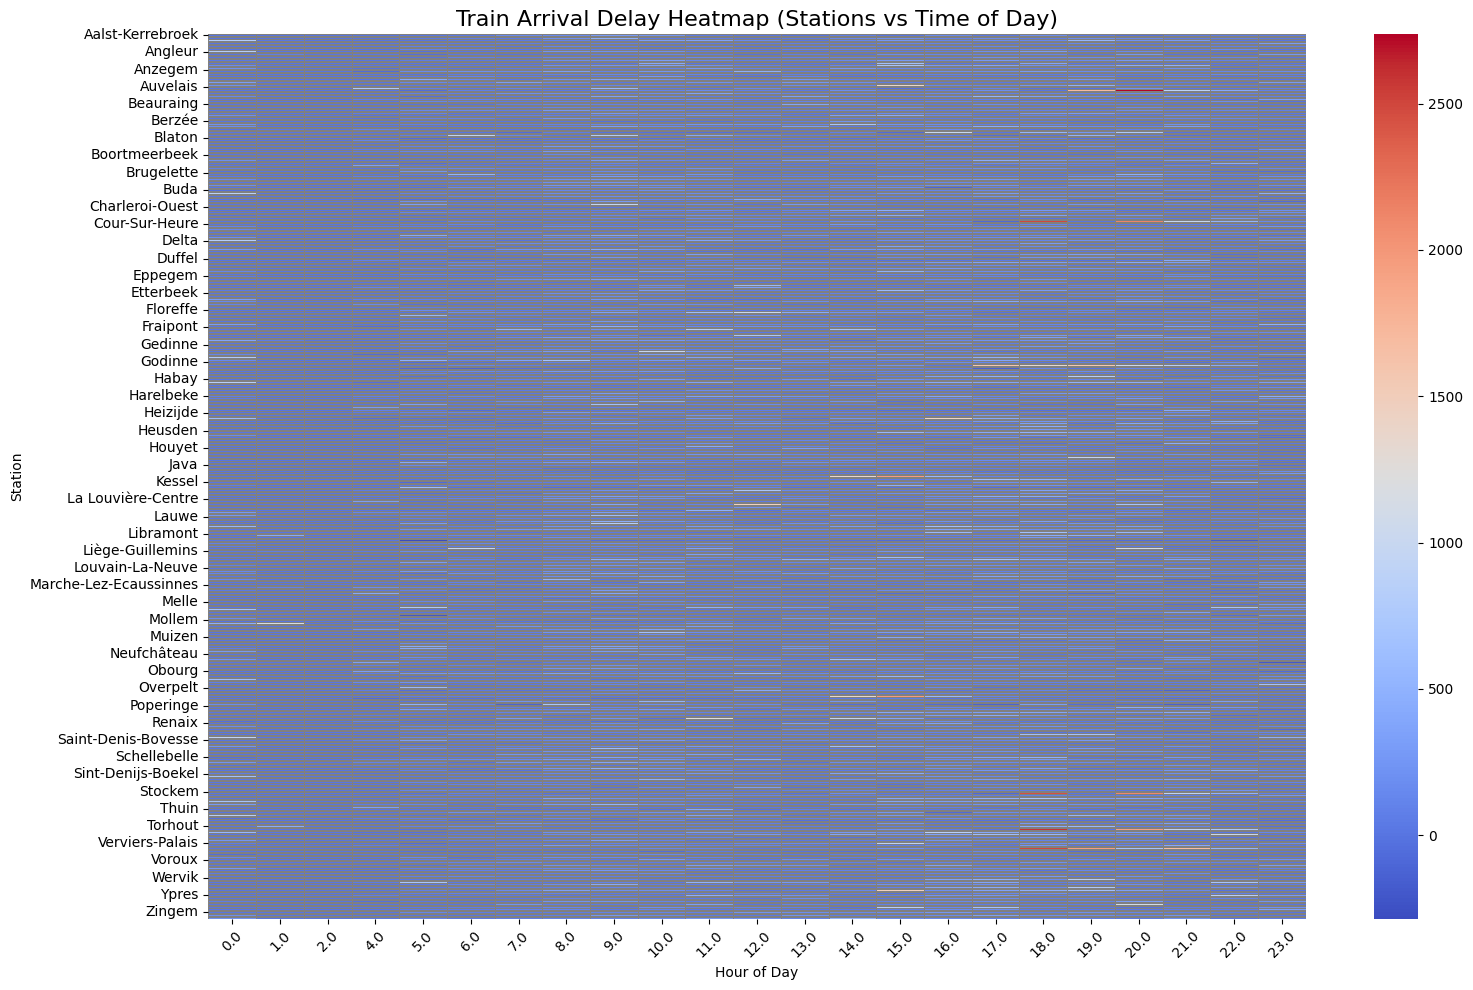

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./mart/public/delays_standardized_titlecase.csv")

# Convert delay to numeric
df["Delay at arrival"] = pd.to_numeric(df["Delay at arrival"], errors="coerce")
df["Stopping place (FR)"] = df["Stopping place (FR)"].astype(str)

# Convert time column to datetime
df["Actual arrival time"] = pd.to_datetime(df["Actual arrival time"], errors="coerce")
df["Hour"] = df["Actual arrival time"].dt.hour

# Clean data
df_clean = df.dropna(subset=["Hour", "Stopping place (FR)", "Delay at arrival"])

# --- STEP 1: Get top 10 stations by average arrival delay ---
top_10_stations = (
    df_clean.groupby("Stopping place (FR)")["Delay at arrival"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter for just those top 10 stations
df_top10 = df_clean[df_clean["Stopping place (FR)"].isin(top_10_stations)]

# --- STEP 2: Create pivot table (station x hour) with average delay ---
heatmap_data = (
    df_top10.groupby(["Stopping place (FR)", "Hour"])["Delay at arrival"]
    .mean()
    .reset_index()
)

pivot_table = heatmap_data.pivot(index="Stopping place (FR)", columns="Hour", values="Delay at arrival")
pivot_table = pivot_table.fillna(0)

# Optional: Sort station rows by total average delay
pivot_table["Avg"] = pivot_table.mean(axis=1)
pivot_table = pivot_table.sort_values("Avg", ascending=False).drop(columns="Avg")

# --- STEP 3: Plot the heatmap ---
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, linecolor='gray')

plt.title("⏱️ Average Arrival Delay Heatmap (Top 10 Stations by Delay)", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Station")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Adding the monthly Data


In [6]:
df=pd.read_csv("/home/learner/Desktop/internship/Dealy_analysis/tempocom-app/Data_raw_punctuality_202505.csv", delimiter=',')

In [ ]:
df.arric()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,THOP1_COD,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,...,DELAY_ARR,DELAY_DEP,CIRC_TYP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
0,01MAY2025,1995,L B1-2,SNCB/NMBS,37,NaN,27,NaN,23:59:50,NaN,...,NaN,110.0,1,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-CENTRAAL,NaN,NaN,01MAY2025,NaN,01MAY2025
1,01MAY2025,1995,L B1-2,SNCB/NMBS,139,=,27,0:03:07,0:04:15,0:02:00,...,67.0,75.0,1,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-BERCHEM,27,02MAY2025,02MAY2025,02MAY2025,02MAY2025
2,01MAY2025,1995,L B1-2,SNCB/NMBS,863,=,27,0:06:52,0:07:36,0:06:00,...,102.0,96.0,1,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL,27,02MAY2025,02MAY2025,02MAY2025,02MAY2025
3,01MAY2025,1995,L B1-2,SNCB/NMBS,877,=,27,0:11:00,0:11:53,0:10:00,...,110.0,113.0,1,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL-LIERSESTEENWEG,27,02MAY2025,02MAY2025,02MAY2025,02MAY2025
4,01MAY2025,1995,L B1-2,SNCB/NMBS,590,=,27,0:14:09,0:14:53,0:13:00,...,69.0,53.0,1,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,HOVE,27,02MAY2025,02MAY2025,02MAY2025,02MAY2025


In [13]:
df[["Arrival line"]]

,Arrival line
0,NaN
1,27
2,27
3,27
4,27
...,...
1919561,50A
1919562,50A
1919563,50A
1919564,50A


In [8]:
df.columns

Index(['DATDEP', 'TRAIN_NO', 'RELATION', 'TRAIN_SERV', 'PTCAR_NO', 'THOP1_COD',
       'LINE_NO_DEP', 'REAL_TIME_ARR', 'REAL_TIME_DEP', 'PLANNED_TIME_ARR',
       'PLANNED_TIME_DEP', 'DELAY_ARR', 'DELAY_DEP', 'CIRC_TYP',
       'RELATION_DIRECTION', 'PTCAR_LG_NM_NL', 'LINE_NO_ARR',
       'PLANNED_DATE_ARR', 'PLANNED_DATE_DEP', 'REAL_DATE_ARR',
       'REAL_DATE_DEP'],
      dtype='object')

In [9]:
df['Delay at arrival'] = df['DELAY_ARR']
df['Delay at departure'] = df['DELAY_DEP']

In [16]:
# Original column names
original_cols = [
    'DATDEP', 'TRAIN_NO', 'RELATION', 'TRAIN_SERV', 'PTCAR_NO', 'THOP1_COD',
    'LINE_NO_DEP', 'REAL_TIME_ARR', 'REAL_TIME_DEP', 'PLANNED_TIME_ARR',
    'PLANNED_TIME_DEP', 'DELAY_ARR', 'DELAY_DEP', 'CIRC_TYP',
    'RELATION_DIRECTION', 'PTCAR_LG_NM_NL', 'LINE_NO_ARR',
    'PLANNED_DATE_ARR', 'PLANNED_DATE_DEP', 'REAL_DATE_ARR',
    'REAL_DATE_DEP'
]

# New column names (aligned manually where possible)
new_names = {
    'DATDEP': 'Date of departure',
    'TRAIN_NO': 'Train number',
    'RELATION': 'Relation',
    'TRAIN_SERV': 'Railway operator',
    'LINE_NO_DEP': 'Departure line',
    'REAL_TIME_ARR': 'Actual arrival time',
    'REAL_TIME_DEP': 'Actual departure time',
    'PLANNED_TIME_ARR': 'Planned arrival time',
    'PLANNED_TIME_DEP': 'Planned departure time',
    'DELAY_ARR': 'Delay at arrival',
    'DELAY_DEP': 'Delay at departure',
    'RELATION_DIRECTION': 'Relation direction',
    'PTCAR_LG_NM_NL': 'Stopping place',
    'LINE_NO_ARR': 'Arrival line',
    'PLANNED_DATE_ARR': 'Planned arrival date',
    'PLANNED_DATE_DEP': 'Planned departure date',
    'REAL_DATE_ARR': 'Actual arrival date',
    'REAL_DATE_DEP': 'Actual departure date'
}

# Apply renaming
df.rename(columns=new_names, inplace=True)


In [18]:
cols_to_keep = [
    'Date of departure',
    'Train number',
    'Relation',
    'Departure line',
    'Actual arrival time',
    'Actual departure time',
    'Planned arrival time',
    'Planned departure time',
    'Delay at arrival',
    'Delay at departure',
    'Relation direction',
    'Stopping place'
]

# Filter the dataframe
df_filtered = df[cols_to_keep]

# Quick check
print(df_filtered.head())
print(df_filtered.columns)

  Date of departure  Train number Relation Departure line Actual arrival time  \
0         01MAY2025          1995   L B1-2             27                 NaN   
1         01MAY2025          1995   L B1-2             27             0:03:07   
2         01MAY2025          1995   L B1-2             27             0:06:52   
3         01MAY2025          1995   L B1-2             27             0:11:00   
4         01MAY2025          1995   L B1-2             27             0:14:09   

  Actual departure time Planned arrival time Planned departure time  \
0              23:59:50                  NaN               23:58:00   
1               0:04:15              0:02:00                0:03:00   
2               0:07:36              0:06:00                0:06:00   
3               0:11:53              0:10:00                0:10:00   
4               0:14:53              0:13:00                0:14:00   

   Delay at arrival  Delay at arrival  Delay at departure  Delay at departure  \
0    

In [19]:
df_filtered.head()

,Date of departure,Train number,Relation,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at arrival,Delay at departure,Delay at departure,Relation direction,Stopping place
0,01MAY2025,1995,L B1-2,27,NaN,23:59:50,NaN,23:58:00,NaN,NaN,110.0,110.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-CENTRAAL
1,01MAY2025,1995,L B1-2,27,0:03:07,0:04:15,0:02:00,0:03:00,67.0,67.0,75.0,75.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-BERCHEM
2,01MAY2025,1995,L B1-2,27,0:06:52,0:07:36,0:06:00,0:06:00,102.0,102.0,96.0,96.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL
3,01MAY2025,1995,L B1-2,27,0:11:00,0:11:53,0:10:00,0:10:00,110.0,110.0,113.0,113.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL-LIERSESTEENWEG
4,01MAY2025,1995,L B1-2,27,0:14:09,0:14:53,0:13:00,0:14:00,69.0,69.0,53.0,53.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,HOVE


In [20]:
# Example: 'Relation direction' column contains strings like "IC 12: KORTRIJK -> WELKENRAEDT"

# Extract the part after the colon (":") first
df_filtered['Relation direction'] = df_filtered['Relation direction'].astype(str)  # ensure string type

# Split by colon, take the second part (stations info)
stations = df_filtered['Relation direction'].str.split(':').str[1].str.strip()

# Split by '->' to get start and end stations
df_filtered[['Start Station', 'End Station']] = stations.str.split('->', expand=True)

# Strip any leading/trailing spaces
df_filtered['Start Station'] = df_filtered['Start Station'].str.strip()
df_filtered['End Station'] = df_filtered['End Station'].str.strip()

# Check the result
print(df_filtered[['Relation direction', 'Start Station', 'End Station']].head())


/tmp/ipykernel_2469920/1775646613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Relation direction'] = df_filtered['Relation direction'].astype(str)  # ensure string type
/tmp/ipykernel_2469920/1775646613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Start Station', 'End Station']] = stations.str.split('->', expand=True)
/tmp/ipykernel_2469920/1775646613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

                       Relation direction       Start Station End Station
0  L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES  ANTWERPEN-CENTRAAL    NIVELLES
1  L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES  ANTWERPEN-CENTRAAL    NIVELLES
2  L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES  ANTWERPEN-CENTRAAL    NIVELLES
3  L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES  ANTWERPEN-CENTRAAL    NIVELLES
4  L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES  ANTWERPEN-CENTRAAL    NIVELLES


In [21]:
df_filtered.head()

,Date of departure,Train number,Relation,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at arrival,Delay at departure,Delay at departure,Relation direction,Stopping place,Start Station,End Station
0,01MAY2025,1995,L B1-2,27,NaN,23:59:50,NaN,23:58:00,NaN,NaN,110.0,110.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-CENTRAAL,ANTWERPEN-CENTRAAL,NIVELLES
1,01MAY2025,1995,L B1-2,27,0:03:07,0:04:15,0:02:00,0:03:00,67.0,67.0,75.0,75.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-BERCHEM,ANTWERPEN-CENTRAAL,NIVELLES
2,01MAY2025,1995,L B1-2,27,0:06:52,0:07:36,0:06:00,0:06:00,102.0,102.0,96.0,96.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL,ANTWERPEN-CENTRAAL,NIVELLES
3,01MAY2025,1995,L B1-2,27,0:11:00,0:11:53,0:10:00,0:10:00,110.0,110.0,113.0,113.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL-LIERSESTEENWEG,ANTWERPEN-CENTRAAL,NIVELLES
4,01MAY2025,1995,L B1-2,27,0:14:09,0:14:53,0:13:00,0:14:00,69.0,69.0,53.0,53.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,HOVE,ANTWERPEN-CENTRAAL,NIVELLES


In [25]:
# Step 1: Normalize the 'Stopping place' column
df_filtered['Stopping place'] = df_filtered['Stopping place'].astype(str).str.strip().str.upper()

# Step 2: Apply cached fuzzy translation
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place'].apply(
    lambda x: fuzzy_translate_cached(x, stations)
)

# Step 3: Capitalize properly (first letter of each word)
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].str.title()

# Step 4: Display the result
print(df_filtered[['Stopping place', 'Stopping place (FR)']].head())

df_filtered['Start Station (FR)'] = df_filtered['Start Station (FR)'].apply(
    lambda x: standardize_station_name(x, list_stations)
)
df_filtered['End Station (FR)'] = df_filtered['End Station (FR)'].apply(
    lambda x: standardize_station_name(x, list_stations)
)
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].apply(
    lambda x: standardize_station_name(x, list_stations)
)


/tmp/ipykernel_2469920/2796245992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Stopping place'] = df_filtered['Stopping place'].astype(str).str.strip().str.upper()


NameError: name 'fuzzy_translate_cached' is not defined

In [28]:
# Step 1: Normalize the 'Stopping place' column
df_filtered['Stopping place'] = df_filtered['Stopping place'].astype(str).str.strip().str.upper()

# Step 2: Apply cached fuzzy translation
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place'].apply(
    lambda x: fuzzy_translate_cached(x, stations)
)

# Step 3: Capitalize properly (first letter of each word)
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].str.title()

# Step 4: Display the result
print(df_filtered[['Stopping place', 'Stopping place (FR)']].head())


/tmp/ipykernel_2469920/1445017813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Stopping place'] = df_filtered['Stopping place'].astype(str).str.strip().str.upper()


NameError: name 'fuzzy_translate_cached' is not defined

In [27]:
def map_nl_to_fr(name, mapping):
    if not isinstance(name, str):
        return name
    name_upper = name.upper().strip()
    return mapping.get(name_upper, name)  # fallback to original if no mapping

# Example applying to 'Stopping place' column:
df_filtered['Stopping place (FR)'] = df_filtered['Stopping place (FR)'].apply(lambda x: map_nl_to_fr(x, nl_to_fr))

# Similarly for other columns:
df_filtered['Start Station (FR)'] = df_filtered['Start Station (FR)'].apply(lambda x: map_nl_to_fr(x, nl_to_fr))
df_filtered['End Station (FR)'] = df_filtered['End Station (FR)'].apply(lambda x: map_nl_to_fr(x, nl_to_fr))

# Optional: format nicely
for col in ['Stopping place (FR)', 'Start Station (FR)', 'End Station (FR)']:
    df_filtered[col] = df_filtered[col].str.title()


KeyError: 'Stopping place (FR)'

In [30]:
df_filtered.columns

Index(['Date of departure', 'Train number', 'Relation', 'Departure line',
       'Actual arrival time', 'Actual departure time', 'Planned arrival time',
       'Planned departure time', 'Delay at arrival', 'Delay at arrival',
       'Delay at departure', 'Delay at departure', 'Relation direction',
       'Stopping place', 'Start Station', 'End Station'],
      dtype='object')

In [32]:
df_filtered.rename(
    columns={
        'Stopping place': 'Stopping place (FR)',
        'Start Station': 'Start Station (FR)',
        'End Station': 'End Station (FR)'
    },
    inplace=True
)

/tmp/ipykernel_2469920/1597301884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(


In [33]:
df_filtered.head()

,Date of departure,Train number,Relation,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at arrival,Delay at departure,Delay at departure,Relation direction,Stopping place (FR),Start Station (FR),End Station (FR)
0,01MAY2025,1995,L B1-2,27,NaN,23:59:50,NaN,23:58:00,NaN,NaN,110.0,110.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-CENTRAAL,ANTWERPEN-CENTRAAL,NIVELLES
1,01MAY2025,1995,L B1-2,27,0:03:07,0:04:15,0:02:00,0:03:00,67.0,67.0,75.0,75.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-BERCHEM,ANTWERPEN-CENTRAAL,NIVELLES
2,01MAY2025,1995,L B1-2,27,0:06:52,0:07:36,0:06:00,0:06:00,102.0,102.0,96.0,96.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL,ANTWERPEN-CENTRAAL,NIVELLES
3,01MAY2025,1995,L B1-2,27,0:11:00,0:11:53,0:10:00,0:10:00,110.0,110.0,113.0,113.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL-LIERSESTEENWEG,ANTWERPEN-CENTRAAL,NIVELLES
4,01MAY2025,1995,L B1-2,27,0:14:09,0:14:53,0:13:00,0:14:00,69.0,69.0,53.0,53.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,HOVE,ANTWERPEN-CENTRAAL,NIVELLES


In [34]:
df_filtered.to_csv('cleaned_monthly', index=False)

In [3]:
import pandas as pd
df_monthly = pd.read_csv('cleaned_monthly.csv')

In [5]:
df_monthly.columns

Index(['Date of departure', 'Train number', 'Relation', 'Departure line',
       'Actual arrival time', 'Actual departure time', 'Planned arrival time',
       'Planned departure time', 'Delay at arrival', 'Delay at arrival.1',
       'Delay at departure', 'Delay at departure.1', 'Relation direction',
       'Stopping place (FR)', 'Start Station (FR)', 'End Station (FR)'],
      dtype='object')

In [7]:
df_monthly.drop(columns=['Delay at arrival.1', 'Delay at departure.1'], inplace=True)

KeyError: "['Delay at arrival.1', 'Delay at departure.1'] not found in axis"

In [8]:
# Save as CSV with minimal size: no index, no header, and compression
df_monthly.to_csv('df_monthly_minimal.csv.gz', index=False, header=False, compression='gzip')

In [ ]:
import pandas as pd

df_monthly = pd.read_csv('cleaned_monthly.csv')